<a href="https://colab.research.google.com/github/Aya-S/Data-Science--Cheat-Sheet/blob/master/CVD_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import pandas as pd
from google.colab import drive 
import sklearn as sk

In [4]:
drive.mount("/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
cardio_df=pd.read_csv("/gdrive/Shared drives/curie/cardio_train.csv", sep=';')

In [6]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [0]:
#remove label from training dataframe
cardio_label= cardio_df['cardio']
cardio_df.drop(columns="cardio", inplace=True)

In [8]:
cardio_df.set_index("id")
#how many data points?
#how many features?
cardio_df_dim = cardio_df.shape
print("There are {} data points with {} features".format(cardio_df_dim[0] , cardio_df_dim[1]))

There are 70000 data points with 12 features


#Explore the data

In [9]:
cardio_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000


count    70000.000000
mean         0.499700
std          0.500003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: cardio, dtype: float64

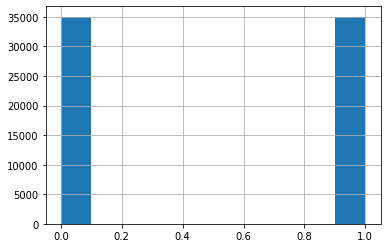

In [10]:
cardio_label.hist()
cardio_label.describe()
#the histogram shows that the classes are balanced 

In [0]:
from sklearn.linear_model import LinearRegression

#Experimentation

In [12]:
reg = LinearRegression().fit(cardio_df, cardio_label)
reg.score(cardio_df, cardio_label)

0.1201672576466928

In [14]:
print("Regression coefficient: {}\n".format(reg.coef_))

Regression coefficient: [ 3.94183504e-08  4.04048993e-05  1.98587860e-02 -2.29059410e-03
  5.36172873e-03  1.32944643e-04  1.35606013e-04  1.31711307e-01
 -2.55818747e-02 -2.24683367e-02 -2.87259183e-02 -4.15365050e-02]



prepare for Productionization

In [0]:
import pickle
pickl = {'model':reg}
pickle.dump(pickl, open('model_file'+".p","wb"))

In [0]:
import flask as fk
import gunicorn as gn

In [0]:
! pip3 freeze > requirements.txt